In [1]:
import MDAnalysis as md
from MDAnalysis.analysis import align
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
plt.rcParams["figure.figsize"] = cm2inch(16,6)
plt.rcParams.update({'font.size':10})
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [3]:
systems=["IA","PA","FA_G-prot","FA_no_G-prot"]
lipid_dir = {"FA_G-prot":"POPC, POPS, POPA, POPG, POPE, CHOL, DPGM3, DPSM, PAP6",
            "FA_no_G-prot":"POPC, POPS, POPA, POPG, POPE, CHOL, DPGM3, DPSM, PAP6",
            "IA":"POPC, POPS, POPA, POPG, POPE, CHOL, DPGM3, DPSM, PAP6",
            "PA":"POPC, POPS, POPA, POPG, POPE, CHOL, DPGM3, DPSM, PAP6"}
unique_lipids = ['POPC','POPS', 'POPA', 'POPG', 'POPE', 'CHOL', 'DPGM3', 'DPSM', 'PAP6']
unique_lipid_labels = ['POPC', 'POPS', 'POPA', 'POPG', 'POPE', 'CHOL', 'GM3', 'SM', 'PIP2']

In [4]:
def TM36_dist (u):
    TM3 = u.select_atoms('resid 253 and name BB', updating=True)
    TM6 = u.select_atoms('resid 343 and name BB', updating=True)

    D = np.zeros([len(u.trajectory[::10])])
    for nf, ts in enumerate(u.trajectory[::10]):
        vec  = TM3.positions - TM6.positions
        dist = np.linalg.norm(vec)
        D[nf] = dist
    return D

def TM67_dist (u):
    TM7 = u.select_atoms('resid 406 and name BB', updating=True)
    TM6 = u.select_atoms('resid 346 and name BB', updating=True)

    D = np.zeros([len(u.trajectory[::10])])
    for nf, ts in enumerate(u.trajectory[::10]):
        vec  = TM7.positions - TM6.positions
        dist = np.linalg.norm(vec)
        D[nf] = dist
    return D

In [8]:
dist_dir = {"IA":"","PA":"", "FA_G-prot":"", "FA_no_G-prot":""}
dist_dir2 = {"IA":"","PA":"", "FA_G-prot":"", "FA_no_G-prot":""}

for s in systems:
    D_loc = []
    for r in range(3):
        print (s)
        u = md.Universe('GRO/{0:s}_0_nowat_renumbered.gro'.format(s), 'XTC/{0:s}_{1:d}_nowat_res_center_fit_last5.xtc'.format(s,r))
        D = TM36_dist(u)
        D_loc.append(D)
        np.save('{0:s}_{1:d}_distance_TM3-TM6.npy'.format(s,r), D)
    dist_dir[s] = D_loc

In [20]:
for s in systems:
    D_loc = []
    for r in range(3):
        print (s)
        u = md.Universe('GRO/{0:s}_0_nowat_renumbered.gro'.format(s), 'XTC/{0:s}_{1:d}_nowat_res_center_fit.xtc'.format(s,r))
        D = TM36_dist(u)
        D_loc.append(D)
        np.save('{0:s}_{1:d}_distance_TM3-TM6_new.npy'.format(s,r), D)
    dist_dir[s] = D_loc

IA


/home/au447022/anaconda3/lib/python3.7/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: A
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/au447022/anaconda3/lib/python3.7/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/au447022/anaconda3/lib/python3.7/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: G
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/au447022/anaconda3/lib/python3.7/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: R
  warnings.warn("Failed to guess the mass for the following atom types: {}".for

IA
IA
PA
PA
PA
FA_G-prot
FA_G-prot
FA_G-prot
FA_no_G-prot
FA_no_G-prot
FA_no_G-prot


In [9]:
for s in systems:
    dist_dir[s] = [ np.load('{0:s}_{1:d}_distance_TM6-TM7.npy'.format(s,r)) for r in range(3) ] 
    
for s in systems:
    dist_dir2[s] = [ np.load('{0:s}_{1:d}_distance_TM3-TM6_new.npy'.format(s,r)) for r in range(3) ] 

In [21]:
def hist2 (data):
    bin_edges = np.linspace(6, 30, 101)
    middle = (bin_edges[:-1] + bin_edges[1:]) / 2
    #data = dist_dir[s]
    
    half = int(data.shape[0]  /2)
    data[:half].shape[0]
    
    h1, b1, = np.histogram(data[:half], bins=bin_edges, normed=True)
    h2, b2, = np.histogram(data[half:], bins=bin_edges, normed=True)
    return h1, h2, middle

/home/au447022/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if __name__ == '__main__':
/home/au447022/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  # Remove the CWD from sys.path while we load stuff.
/home/au447022/anaconda3/lib/python3.7/site-packages/ipykernel_l

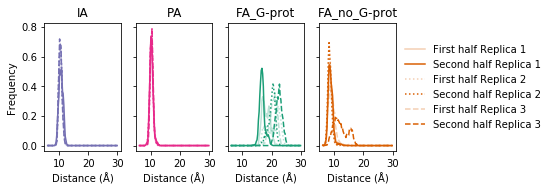

In [25]:
fig, ax = plt.subplots(ncols=4, sharey=True, sharex=True)
color_list = ['#7570b3','#e7298a','#1b9e77','#d95f02']
linestyle_list = ['solid', 'dotted', 'dashed']


for sdx, s in enumerate(systems):
    data = dist_dir[s]
    for r in range(3):
        h1,h2,x = hist2(data[r])
        ax[sdx].plot(x, h1, label='First half Replica {0:d}'.format(r+1), color=color_list[sdx], alpha=0.3, linestyle=linestyle_list[r])
        ax[sdx].plot(x, h2, label='Second half Replica {0:d}'.format(r+1), color=color_list[sdx], linestyle=linestyle_list[r])
        #ax[sdx].legend(loc='best', frameon=False)
        ax[sdx].set_xlabel('Distance (Å)')
        ax[sdx].set_title(s)
ax[0].set_ylabel('Frequency')
ax[3].legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
#plt.savefig('Distance_TM3-TM6_all_NEW.png', dpi=300, bbox_inches='tight')

[[<matplotlib.lines.Line2D at 0x7fa4f4fe8bd0>],

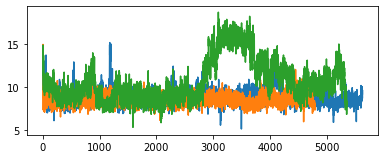

In [23]:
[ plt.plot(d) for d in dist_dir['FA_no_G-prot'] ]

[[<matplotlib.lines.Line2D at 0x7fa4f52627d0>],

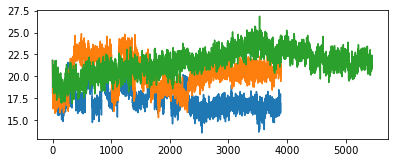

In [24]:
[ plt.plot(d) for d in dist_dir['FA_G-prot'] ]

In [13]:
color_list = ['#7570b3','#e7298a','#1b9e77','#d95f02']

for sdx, s in enumerate(systems):
    bin_edges = np.linspace(6, 30, 101)
    middle = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    data = dist_dir2[s]
    
    half = int(data.shape[0]  /2)
    data[:half].shape[0]
    
    h1, b1, = np.histogram(data[:half], bins=bin_edges, normed=True)
    h2, b2, = np.histogram(data[half:], bins=bin_edges, normed=True)
    plt.plot(middle, h1, label=s+' first half', color=color_list[sdx], alpha=0.3)
    plt.plot(middle, h2, label=s+' second half', color=color_list[sdx])
    
    #hist, b = np.histogram(dist_dir[s], bins=bin_edges, normed=True)
    #plt.plot(middle, hist, label=s, color=color_list[sdx])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.xlabel('Distance (Å)')
plt.ylabel('Frequency')
plt.title('TM3-TM6 distance')
#plt.savefig('TM36_distance.png', dpi=300, bbox_inches='tight')

AttributeError: 'list' object has no attribute 'shape'